In [1]:
import numpy as np, pandas as pd,matplotlib as mtl

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

<h3>Домашнее задание</h3>

1. Подберите скорость обучения (eta) и количество итераций

In [6]:
input_=int(input('Введите количество итераций: '))

Введите количество итераций: 1400


In [7]:
def change_parameter(param1):
    if param1<=10000 and param1>5000:
        eta=0.5
        return eta,param1
    elif param1<=5000 and param1>1000:
        eta=1e-1
        return eta,param1
    elif param1<=1000:
        eta=1e-2
        return eta,param1
    else:
        print('Не верно указано число итераций')

In [8]:
def draw(*args):
    title_dict={'family':'Calibri','fontsize':16,'fontweight':'bold'}
    x_args,y_args,n_iter=args
    plt.figure(figsize=(10,8))
    plt.plot(x_args,y_args,color='red')
    plt.title('MSE dynamics',fontdict=title_dict)
    plt.xlabel('number of iters')
    plt.ylabel('MSE')
    if n_iter>1000:
        plt.yscale(value='log')
    plt.show()

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75,eta=0.09090909090909091
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500076e+24,eta=0.056447393005377725
Iteration #100: W_new = [48.41963663 22.99884414], MSE = 53518.86,eta=0.03504938994813923
Iteration #150: W_new = [45.03191704  3.81804575], MSE = 43.97,eta=0.021762913579014855
Iteration #200: W_new = [45.0492265   3.81490695], MSE = 43.97,eta=0.013513057093103954
Iteration #250: W_new = [45.0545817   3.81393586], MSE = 43.97,eta=0.008390545288824004
Iteration #300: W_new = [45.05675085  3.81354252], MSE = 43.97,eta=0.00520986848192436
Iteration #350: W_new = [45.05778605  3.8133548 ], MSE = 43.97,eta=0.003234918430760665
Iteration #400: W_new = [45.05833235  3.81325574], MSE = 43.97,eta=0.002008629832016357
Iteration #450: W_new = [45.05863908  3.81320012], MSE = 43.97,eta=0.0012472010928316845
Iteration #500: W_new =

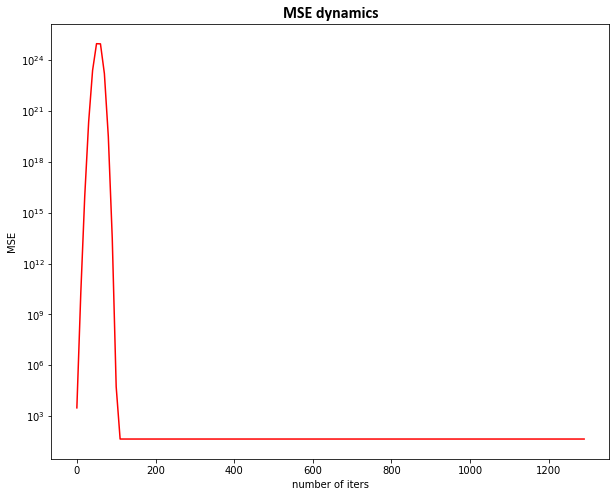

In [9]:
n = X.shape[0]
eta,n_iter=change_parameter(input_)

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
number_of_iters=[]
number_of_MSE=[]
for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
        MSE=round(err, 2)

        
    if i % 10 == 0:
        eta /= 1.1
    
    if i%10==0:
        number_of_iters.append(i)
        number_of_MSE.append(MSE)
    if n_iter<=500:
        if i%10==0:
            print(f'Iteration #{i}: W_new = {W}, MSE = {MSE},eta={eta}')
    elif n_iter>500 and n_iter<=1000:
        if i%20==0:
            print(f'Iteration #{i}: W_new = {W}, MSE = {MSE},eta={eta}')
    else:
        if i%50==0:
            print(f'Iteration #{i}: W_new = {W}, MSE = {MSE},eta={eta}')
            
draw(number_of_iters,number_of_MSE,n_iter)

In [9]:
#Увеличение количества итераций, при сохранении скорости обучения или ее постепенном уменьшении сокращает ошибку постепенно.
#Если изначально берем бОльшую скорость обучения, например на 1e-1 или 0.5, то есть риск, что мы перескочим точку эксремума(точку минимума), что
#и прозошло. Далее по мере уменьшения скорости обучения, мы приблежаемся к точке экстремума(точка минимума). В решении данной задачи
#мы рассмотрели пример, когда взяли бОльшую скорость обучения, а потом резко ее уменьшили, на что увидели характерное поведение
#ошибки: сперва она сильна выросла, потом также сильно рухнула и далее держалась на том уже уровне, поскольку скорость обучения
#стала весьма мала

-----------------------

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [10]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * X.T @(y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)},eta={eta}')
        
#Убрал внутренний цикл for, вместо W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y)) записал: W -= eta * (1/n * 2 * X.T @(y_pred - y))

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75,eta=0.00909090909090909
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71,eta=0.008264462809917354
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91,eta=0.007513148009015776
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46,eta=0.006830134553650705
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03,eta=0.006209213230591549
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73,eta=0.005644739300537772
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77,eta=0.005131581182307065
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06,eta=0.004665073802097332
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08,eta=0.004240976183724847
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65,eta=0.0038554328942953147


---------------------

3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [11]:
n = X.shape[0]
epsilon = 1e-8
eta = 1e-2 
#n_iter = 100
i=0

W_list=[]
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while True:
    list(map(lambda x:W_list.append(x),W))
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * X.T @(y_pred - y))
    i+=1
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)},eta={eta}')
    try:
        if np.abs(W_list[-1]-W_list[-3])<=epsilon and np.abs(W_list[-2]-W_list[-4])<=epsilon:
            break
    except:
        continue
print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)},eta={eta}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [ 6.64172205 10.62940003], MSE = 752.02,eta=0.00909090909090909
Iteration #20: W_new = [ 9.73455758 10.2154565 ], MSE = 641.65,eta=0.008264462809917354
Iteration #30: W_new = [12.3092558   9.75169096], MSE = 556.94,eta=0.007513148009015776
Iteration #40: W_new = [14.48555442  9.35715272], MSE = 490.42,eta=0.006830134553650705
Iteration #50: W_new = [16.33769149  9.02130082], MSE = 437.48,eta=0.006209213230591549
Iteration #60: W_new = [17.92347703  8.73374335], MSE = 394.83,eta=0.005644739300537772
Iteration #70: W_new = [19.28865829  8.4861888 ], MSE = 360.09,eta=0.005131581182307065
Iteration #80: W_new = [20.46977663  8.27201121], MSE = 331.51,eta=0.004665073802097332
Iteration #90: W_new = [21.49627093  8.08587229], MSE = 307.78,eta=0.004240976183724847
Iteration #100: W_new = [22.39204942  7.92343668], MSE = 287.92,eta=0.0038554328942953147
Iteration #110: W_new = [23.1

In [111]:
#Понадобилось 1732 итерации, чтобы дойти до значений весов, разность с предыдущими значениями которых <=эпсилон